In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import plotly.express as px
import plotly
import os
import sys
import seaborn as sns
import sklearn as sk
import miceforest as mf

pd.set_option('max_columns', 999)
pd.set_option('max_rows', 20)
cwd = os.getcwd()

In [3]:
# load original dataframe with NaNs in oplnivma and oplnivpa and stats
df = pd.read_csv(cwd + "/../output/out.csv", index_col=0)
print(df.head())
df_stats= pd.read_csv(cwd + "/../output/df_stats.csv", index_col=0)
print(df_stats.head())

In [4]:
print(df.isna().sum())
print(df.shape)

GENDER              0
ETHN                0
WPOTAALLV           0
WPOTAALTV           0
ADV_TEACH           0
ADV_TEST            0
ADV_FINAL           0
LEVEL3              0
WOZ                 0
PERCBESTINKO        0
OPLNIVMA        51458
OPLNIVPA        66973
SECMMA              0
SECMPA              0
dtype: int64
(297035, 14)


In [5]:
print(df.loc[:, ['OPLNIVMA', 'OPLNIVPA']].isna().sum(axis=1).value_counts())

0    178604
1    118431
dtype: int64


In [6]:
print(df.loc[:, ['OPLNIVMA']].isna().sum()/df.shape[0])
print(df.loc[:, ['OPLNIVPA']].isna().sum()/df.shape[0])
print(0.173239 + 0.225472)

OPLNIVMA    0.173239
dtype: float64
OPLNIVPA    0.225472
dtype: float64
0.39871100000000004


In [7]:
df_clean_2 = df.copy()

In [8]:
df_clean_2 = df_clean_2.astype({'OPLNIVMA': 'category', 'OPLNIVPA' : 'category', 'SECMMA': 'category', 'SECMPA': 'category', 'GENDER' : 'category', 'ETHN' : 'category', 'WPOTAALLV' : 'category', 'WPOTAALTV' : 'category', 'ADV_TEACH' : 'category', 'ADV_TEST' : 'category', 'ADV_FINAL' : 'category', 'LEVEL3' : 'category'})

In [9]:
df_clean_2.dtypes

GENDER          category
ETHN            category
WPOTAALLV       category
WPOTAALTV       category
ADV_TEACH       category
ADV_TEST        category
ADV_FINAL       category
LEVEL3          category
WOZ              float64
PERCBESTINKO     float64
OPLNIVMA        category
OPLNIVPA        category
SECMMA          category
SECMPA          category
dtype: object

In [12]:
# takes around 15 min.
kernelMeanMatch = mf.MultipleImputedKernel(df_clean_2, datasets=5, save_all_iterations=True, random_state=42, mean_match_candidates=5)
kernelMeanMatch.mice(5)

new_data = kernelMeanMatch.complete_data(0)
new_data.reset_index(drop=True, inplace=True)
df_stats.reset_index(drop=True, inplace=True)
new_data = pd.concat([new_data, df_stats], axis=1)
new_data.to_csv('../output/out1.csv')

new_data1 = kernelMeanMatch.complete_data(1)
new_data1.reset_index(drop=True, inplace=True)
new_data1 = pd.concat([new_data1, df_stats], axis=1)
new_data1.to_csv('../output/out2.csv')

new_data2 = kernelMeanMatch.complete_data(2)
new_data2.reset_index(drop=True, inplace=True)
new_data2 = pd.concat([new_data2, df_stats], axis=1)
new_data2.to_csv('../output/out3.csv')

new_data3 = kernelMeanMatch.complete_data(3)
new_data3.reset_index(drop=True, inplace=True)
new_data3 = pd.concat([new_data3, df_stats], axis=1)
new_data3.to_csv('../output/out4.csv')

new_data4 = kernelMeanMatch.complete_data(4)
new_data4.reset_index(drop=True, inplace=True)
new_data4 = pd.concat([new_data4, df_stats], axis=1)
new_data4.to_csv('../output/out5.csv')

In [13]:
#print results
print(kernelMeanMatch)
print("numerical vars:")
print(kernelMeanMatch._get_num_vars())
print("categorical vars:")
print(kernelMeanMatch._get_cat_vars())

              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 5
         Iterations: 5
  Imputed Variables: 2
save_all_iterations: True
numerical vars:
[]
categorical vars:
['OPLNIVMA', 'OPLNIVPA']


In [14]:
#only numerical variables
# kernelMeanMatch.plot_imputed_distributions(wspace=0.5, hspace=0.7)

In [15]:
# kernelMeanMatch.plot_correlations()

In [16]:
# kernelMeanMatch.plot_mean_convergence(wspace=0.5, hspace=0.7)

In [1]:
fig = kernelMeanMatch.plot_feature_importance(annot=False, cmap="Binary", vmin=0, vmax=1)

In [127]:
df = pd.read_csv(cwd + "/../output/out.csv", index_col=0)
new_data = pd.read_csv(cwd + "/../output/out1.csv", index_col=0)
new_data1 = pd.read_csv(cwd + "/../output/out2.csv", index_col=0)
new_data2 = pd.read_csv(cwd + "/../output/out3.csv", index_col=0)
new_data3 = pd.read_csv(cwd + "/../output/out4.csv", index_col=0)
new_data4 = pd.read_csv(cwd + "/../output/out5.csv", index_col=0)

In [2]:
df["dataset"] = 'Original data'
new_data["dataset"] = 'Dataset 1'
new_data1["dataset"] = 'Dataset 2'
new_data2["dataset"] = 'Dataset 3'
new_data3["dataset"] = 'Dataset 4'
new_data4["dataset"] = 'Dataset 5'

data=pd.concat([df[["OPLNIVMA", "OPLNIVPA", "dataset"]], new_data[["OPLNIVMA", "OPLNIVPA", "dataset"]], new_data1[["OPLNIVMA", "OPLNIVPA", "dataset"]], new_data2[["OPLNIVMA", "OPLNIVPA", "dataset"]], new_data3[["OPLNIVMA", "OPLNIVPA", "dataset"]], new_data4[["OPLNIVMA", "OPLNIVPA", "dataset"]]], keys=['Original data', 'dataset 1', 'dataset 2', 'dataset 3', 'dataset 4', 'dataset 5'], names=['Dataset', 'index'])
print(data)

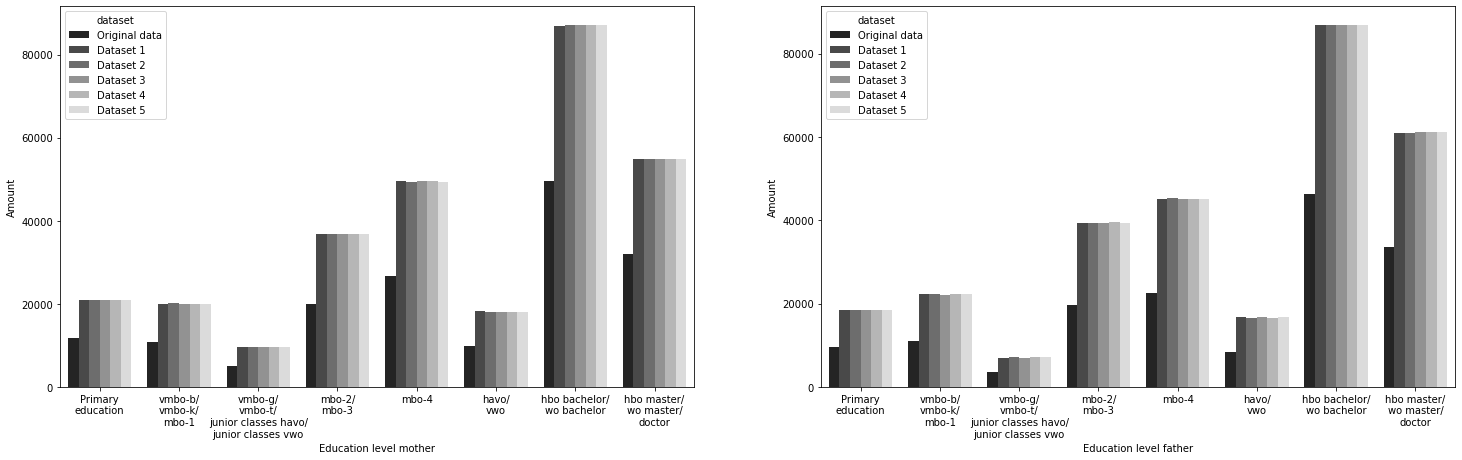

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
ax1 = sns.countplot(x="OPLNIVMA", hue="dataset", ax=ax1, data=data, palette="binary_r")
ax2 = sns.countplot(x="OPLNIVPA", hue="dataset", ax=ax2, data=data, palette="binary_r")

ax1.set_xlabel('Education level mother')
ax2.set_xlabel('Education level father')
ax1.set_xticklabels(('Primary\neducation', 'vmbo-b/\nvmbo-k/\nmbo-1', 'vmbo-g/\nvmbo-t/\njunior classes havo/\njunior classes vwo', 'mbo-2/\nmbo-3', 'mbo-4', 'havo/\nvwo', 'hbo bachelor/\nwo bachelor', 'hbo master/\nwo master/\ndoctor'))
ax2.set_xticklabels(('Primary\neducation', 'vmbo-b/\nvmbo-k/\nmbo-1', 'vmbo-g/\nvmbo-t/\njunior classes havo/\njunior classes vwo', 'mbo-2/\nmbo-3', 'mbo-4', 'havo/\nvwo', 'hbo bachelor/\nwo bachelor', 'hbo master/\nwo master/\ndoctor'))
ax1.set_ylabel('Amount')
ax2.set_ylabel('Amount')

fig.savefig("../output/res_imputation.pdf")